In [36]:
import pandas as pd
my_data = pd.read_csv("20230828_3.3_Datensatz_Airbnb.csv")
my_data

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [37]:
my_data['city_id'], _ = pd.factorize(my_data['City'])

In [38]:
city_counts = my_data['City'].value_counts()
print(city_counts)

Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: City, dtype: int64


In [39]:
city_counts_df = city_counts.reset_index()
city_counts_df.columns = ['City', 'Number of Airbnbs']

print(city_counts_df)

        City  Number of Airbnbs
0       Rome               9027
1      Paris               6688
2     Lisbon               5763
3     Athens               5280
4   Budapest               4022
5     Vienna               3537
6  Barcelona               2833
7     Berlin               2484
8  Amsterdam               2080


In [40]:
my_data['Price'] = my_data['Price'].round(2)


In [41]:
top_10 = (my_data.groupby(['City'])['city_id'].count()
        .sort_values(ascending = False).head(10))
top_10

City
Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: city_id, dtype: int64

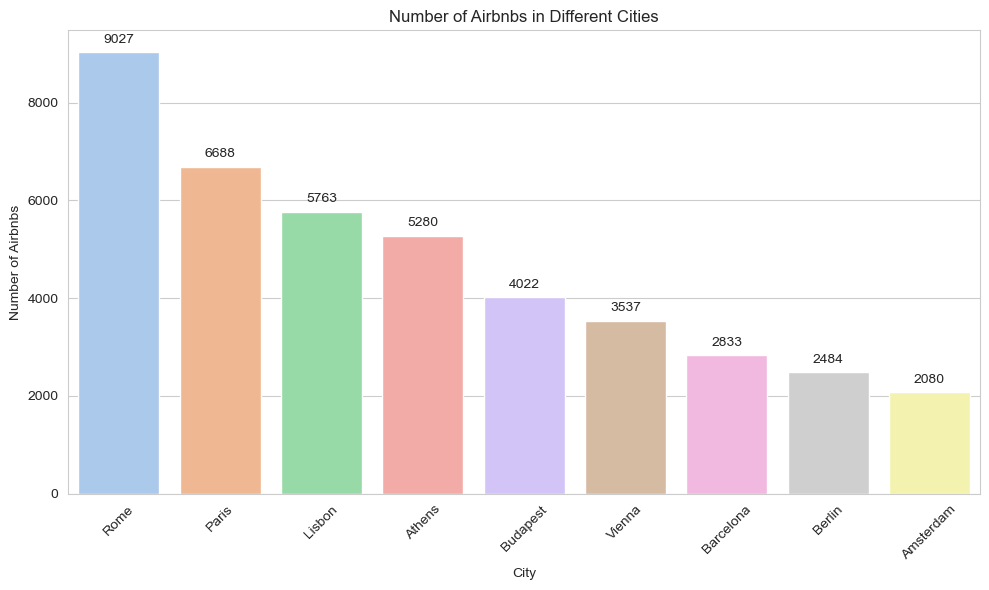

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=city_counts_df, x='City', y='Number of Airbnbs', palette=colors)
plt.xlabel('City')
plt.ylabel('Number of Airbnbs')
plt.title('Number of Airbnbs in Different Cities')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.tight_layout()
plt.savefig('city_counts_bar_chart.png')

plt.show()


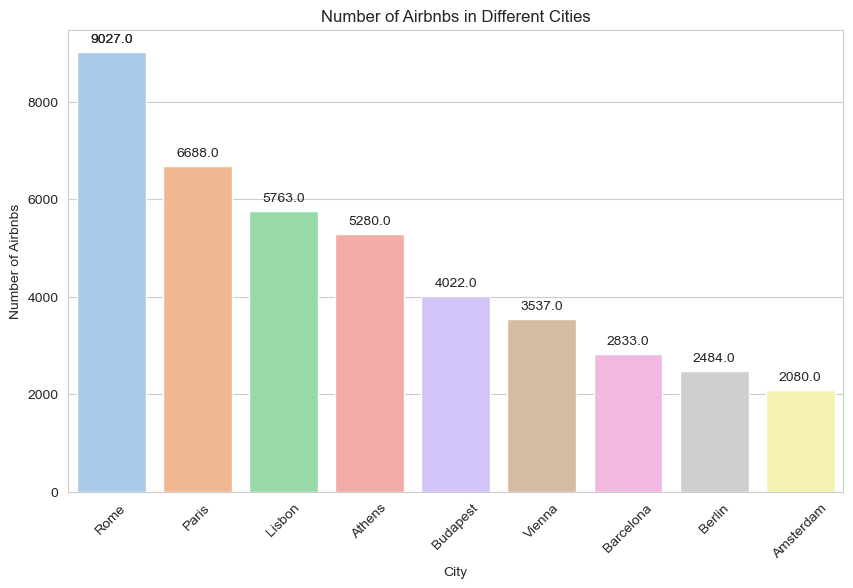

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

colors = sns.color_palette("pastel")

fig, ax = plt.subplots(figsize=(10, 6))

bars = sns.barplot(data=city_counts_df, x='City', y='Number of Airbnbs', palette=colors, ax=ax)
plt.xlabel('City')
plt.ylabel('Number of Airbnbs')
plt.title('Number of Airbnbs in Different Cities')
plt.xticks(rotation=45)

def animate(i):
    bar = bars.patches[i]
    height = bar.get_height()
    ax.annotate(f'{height}',
                (bar.get_x() + bar.get_width() / 2., height),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

ani = animation.FuncAnimation(fig, animate, frames=len(city_counts_df), interval=1000, repeat=False)

ani.save('animated_city_counts.gif', writer='pillow')

plt.show()


In [43]:
desirable_neighborhoods = list(top_10.index)
property_types_count = my_data.groupby(['City','Price'], as_index = False)['city_id'].count()
property_types_count = (property_types_count.
                        sort_values(by = 'city_id', ascending = False)
                       )
property_types_count

,City,Price,city_id
6707,Rome,184.46,188
6629,Rome,161.55,167
6525,Rome,126.72,162
937,Athens,116.00,145
1002,Athens,138.96,133
...,...,...,...
3797,Lisbon,174.72,1
3802,Lisbon,176.13,1
3808,Lisbon,178.00,1
3810,Lisbon,178.71,1


In [44]:
import folium

map_center = [48.8566, 2.3522]
my_map = folium.Map(location=map_center, zoom_start=4)

cities = {
    "Rome": (41.9028, 12.4964),
    "Paris": (48.8566, 2.3522),
    "Lisbon": (38.7223, -9.1393),
    "Athens": (37.9838, 23.7275),
    "Budapest": (47.4979, 19.0402),
    "Vienna": (48.2082, 16.3738),
    "Barcelona": (41.3851, 2.1734),
    "Berlin": (52.5200, 13.4050)
}

for city, coords in cities.items():
    folium.CircleMarker(
        location=coords,
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(my_map)

my_map.save("city_airbnb_map.html")


In [45]:
for city in top_10:
    if city in cities:
        coords = cities[city]
        folium.CircleMarker(
            location=coords,
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(my_map)
my_map.save("top_10_airbnb_map.html")

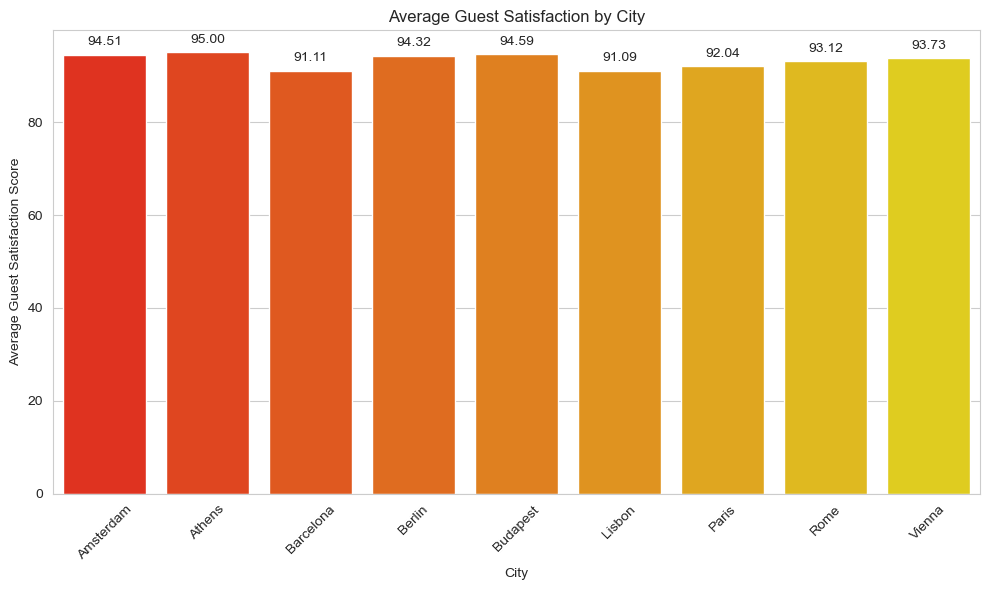

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

average_satisfaction = my_data.groupby('City')['Guest Satisfaction'].mean().reset_index()

# bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=average_satisfaction, x='City', y='Guest Satisfaction', palette='autumn')
plt.xlabel('City')
plt.ylabel('Average Guest Satisfaction Score')
plt.title('Average Guest Satisfaction by City')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()


In [47]:
city_room_type_counts = my_data.groupby(['City', 'Room Type', 'Person Capacity']).size().reset_index(name='Counts')
print(city_room_type_counts)

          City        Room Type  Person Capacity  Counts
0    Amsterdam  Entire home/apt              2.0     511
1    Amsterdam  Entire home/apt              3.0      85
2    Amsterdam  Entire home/apt              4.0     474
3    Amsterdam  Entire home/apt              5.0      18
4    Amsterdam  Entire home/apt              6.0      38
..         ...              ...              ...     ...
117     Vienna     Private room              5.0       9
118     Vienna     Private room              6.0       6
119     Vienna      Shared room              2.0      11
120     Vienna      Shared room              5.0       2
121     Vienna      Shared room              6.0       3

[122 rows x 4 columns]


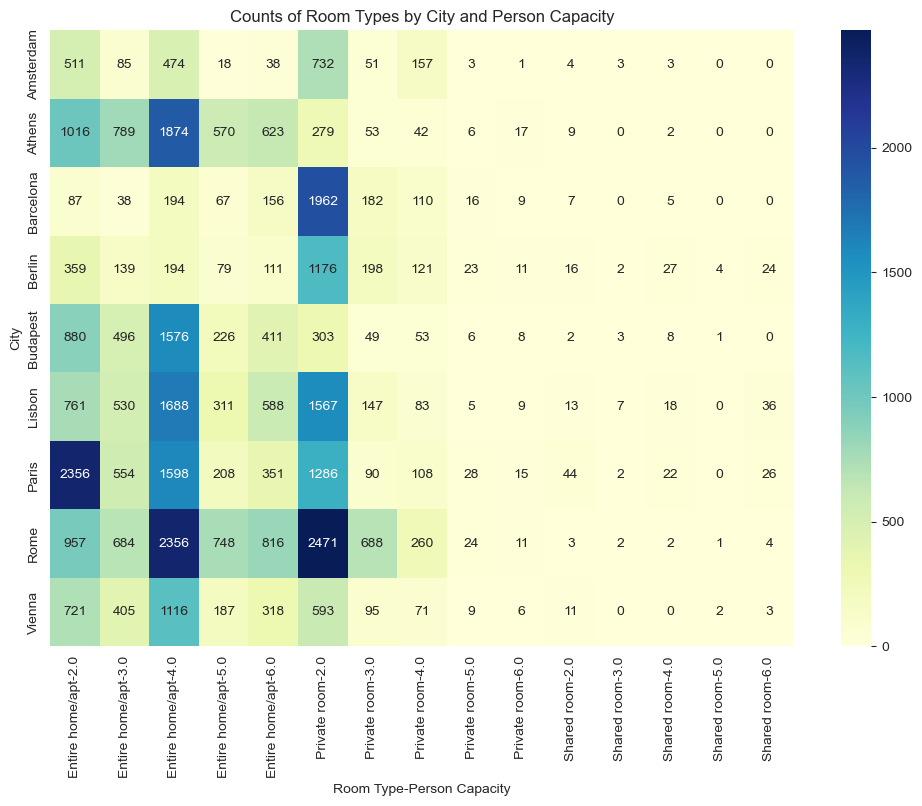

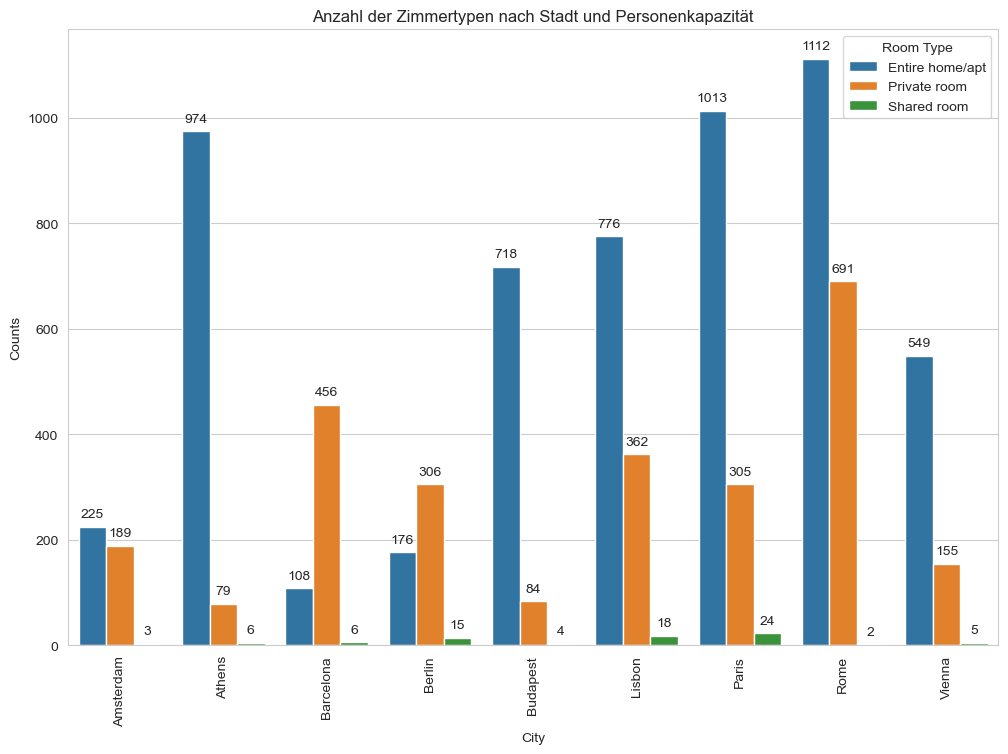

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

city_room_capacity_counts = my_data.groupby(['City', 'Room Type', 'Person Capacity']).size().reset_index(name='Counts')

# heatmap
heatmap_data = city_room_capacity_counts.pivot_table(index='City', columns=['Room Type', 'Person Capacity'], values='Counts', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Counts of Room Types by City and Person Capacity')
plt.show()

# grouped bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=city_room_capacity_counts, x='City', y='Counts', hue='Room Type', ci=None)
plt.xticks(rotation=90)
plt.title('Anzahl der Zimmertypen nach Stadt und Personenkapazität')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()


In [49]:
city_mean_prices = my_data.groupby('City')['Price'].mean().round(2)
city_mean_prices

City
Amsterdam    573.11
Athens       151.74
Barcelona    293.75
Berlin       244.58
Budapest     176.51
Lisbon       238.21
Paris        392.53
Rome         205.39
Vienna       241.58
Name: Price, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_3204\3703286885.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax = sns.barplot(data=my_data, x='City', y='Price', estimator=pd.np.median, ci=None, palette='Set3')


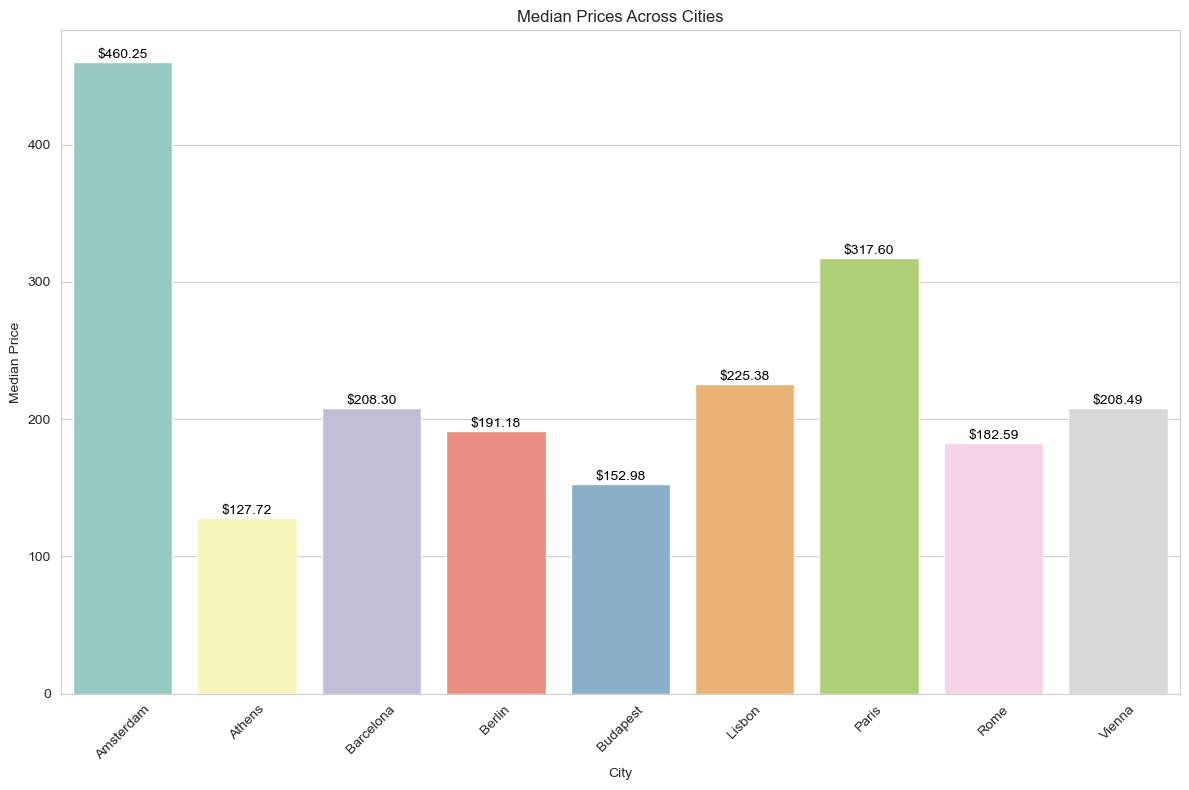

In [50]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=my_data, x='City', y='Price', estimator=pd.np.median, ci=None, palette='Set3')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Median Price')
plt.title('Median Prices Across Cities')
for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()


In [51]:
correlation_matrix = my_data.corr()

guest_satisfaction_correlation = correlation_matrix['Guest Satisfaction']

sorted_correlations = guest_satisfaction_correlation.abs().sort_values(ascending=False)

print(sorted_correlations)


Guest Satisfaction             1.000000
Cleanliness Rating             0.691645
Superhost                      0.292312
Business                       0.178954
Restraunt Index                0.072687
city_id                        0.060624
Private Room                   0.052664
Attraction Index               0.048882
Normalised Restraunt Index     0.047862
Bedrooms                       0.042753
Multiple Rooms                 0.040208
Shared Room                    0.035134
City Center (km)               0.031176
Metro Distance (km)            0.025290
Normalised Attraction Index    0.024609
Person Capacity                0.017348
Price                          0.016069
Name: Guest Satisfaction, dtype: float64


In [52]:
import pandas as pd
import statsmodels.api as sm

selected_features = ['Cleanliness Rating', 'Bedrooms', 'Person Capacity']

X = sm.add_constant(my_data[selected_features])

y = my_data['Guest Satisfaction']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Guest Satisfaction   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                 1.277e+04
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:40:20   Log-Likelihood:            -1.3307e+05
No. Observations:               41714   AIC:                         2.662e+05
Df Residuals:                   41710   BIC:                         2.662e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 33.0727      0

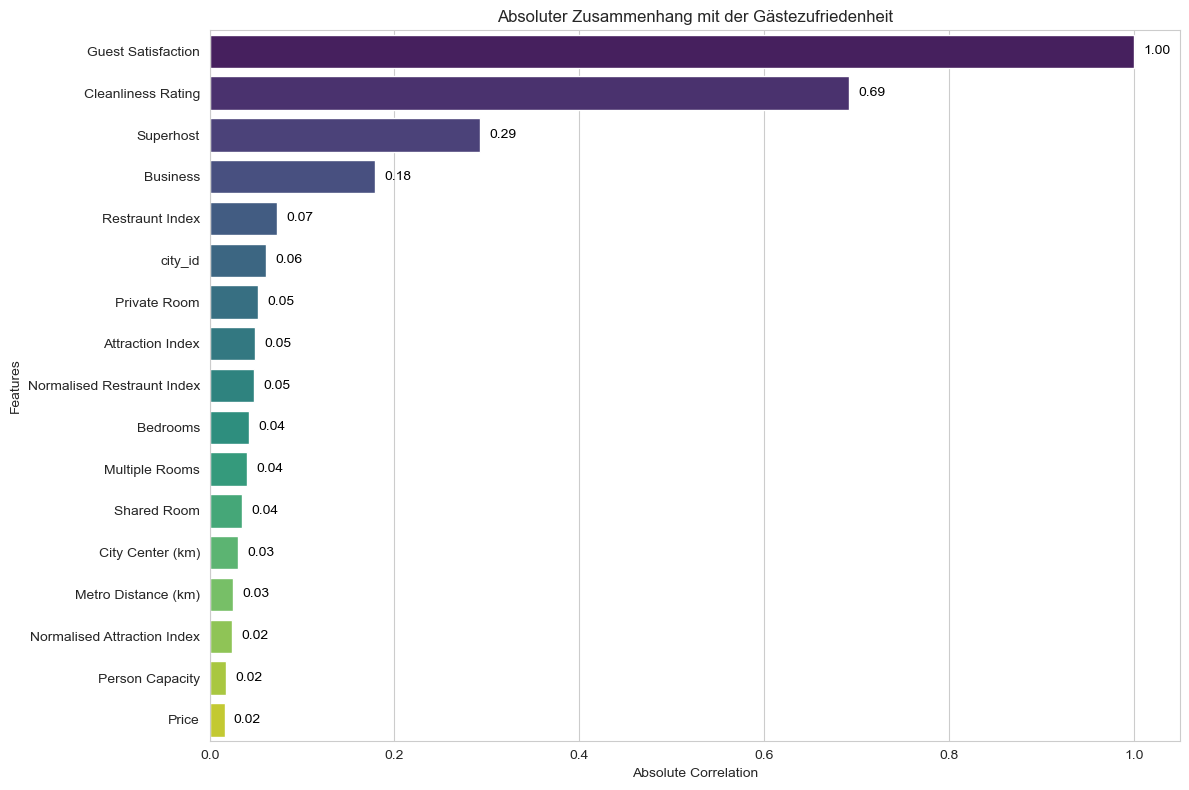

In [53]:
correlation_matrix = my_data.corr()
guest_satisfaction_correlation = correlation_matrix['Guest Satisfaction']
sorted_correlations = guest_satisfaction_correlation.abs().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
ax= sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='viridis')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.title('Absoluter Zusammenhang mit der Gästezufriedenheit')
for i, v in enumerate(sorted_correlations):
    ax.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')
plt.tight_layout()
plt.show()

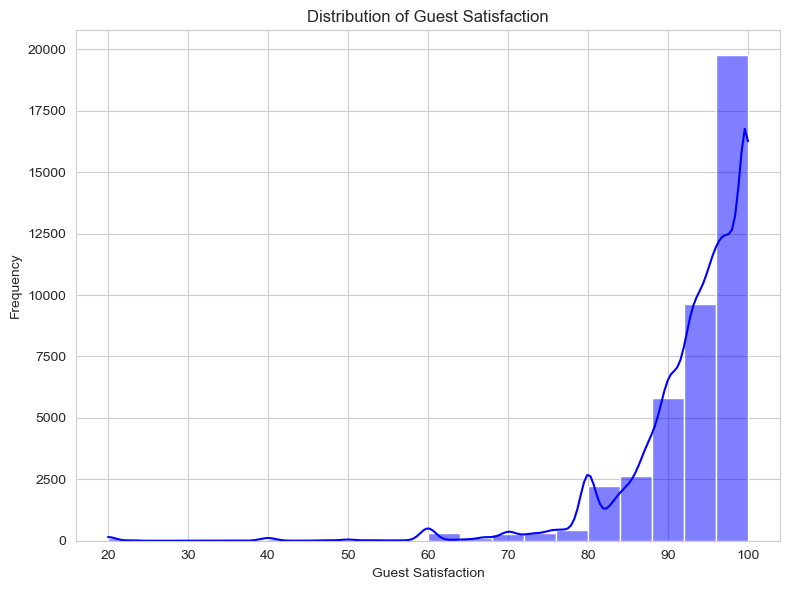

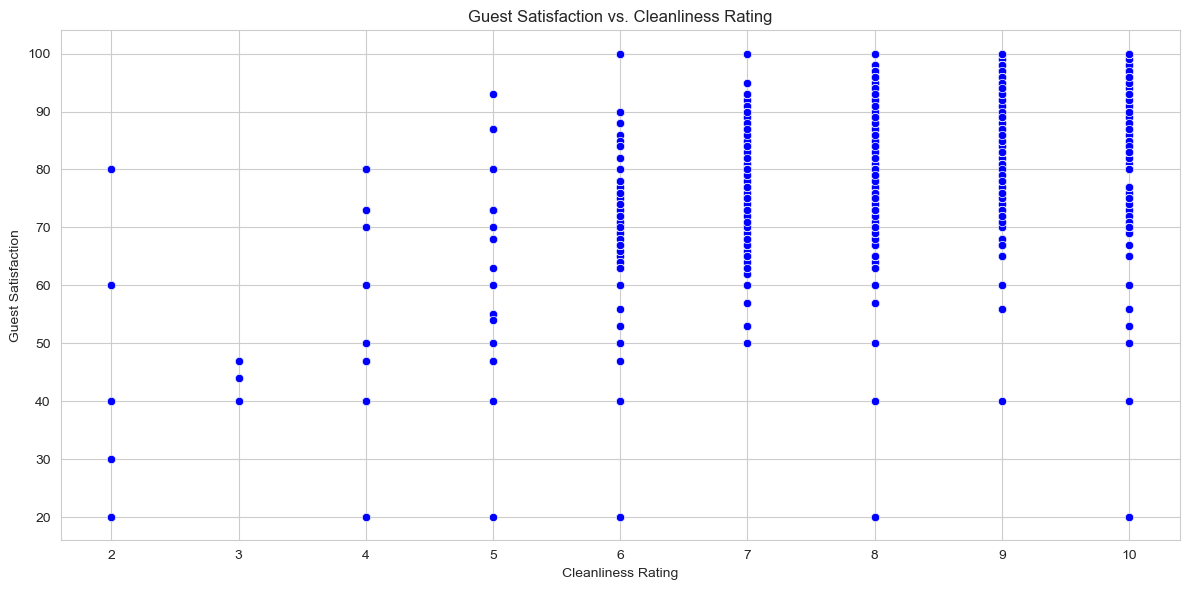

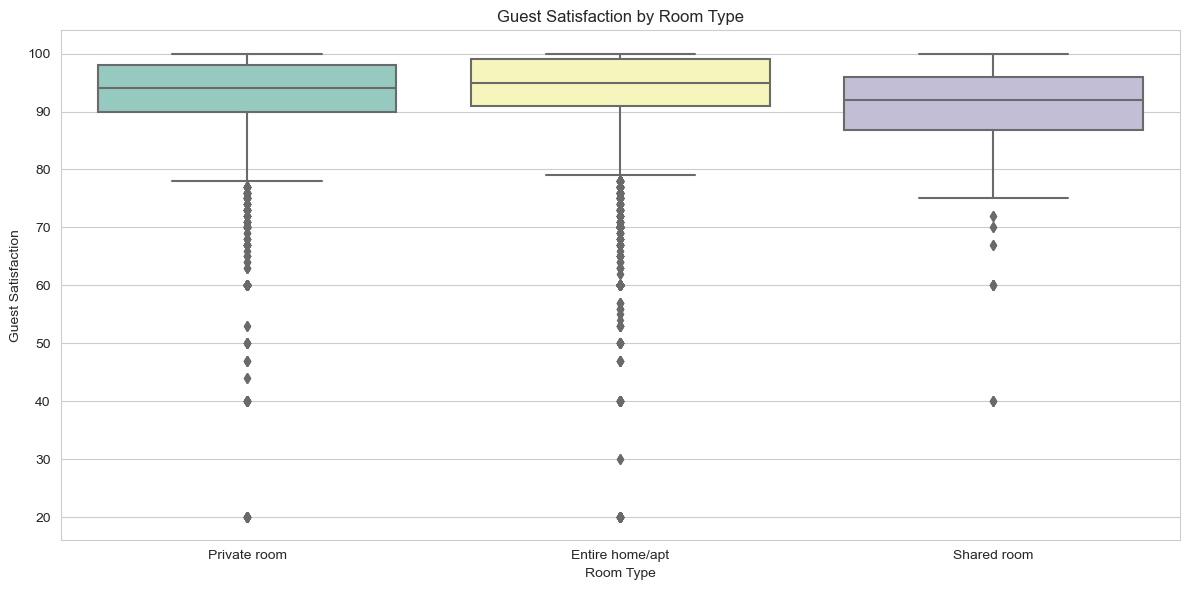

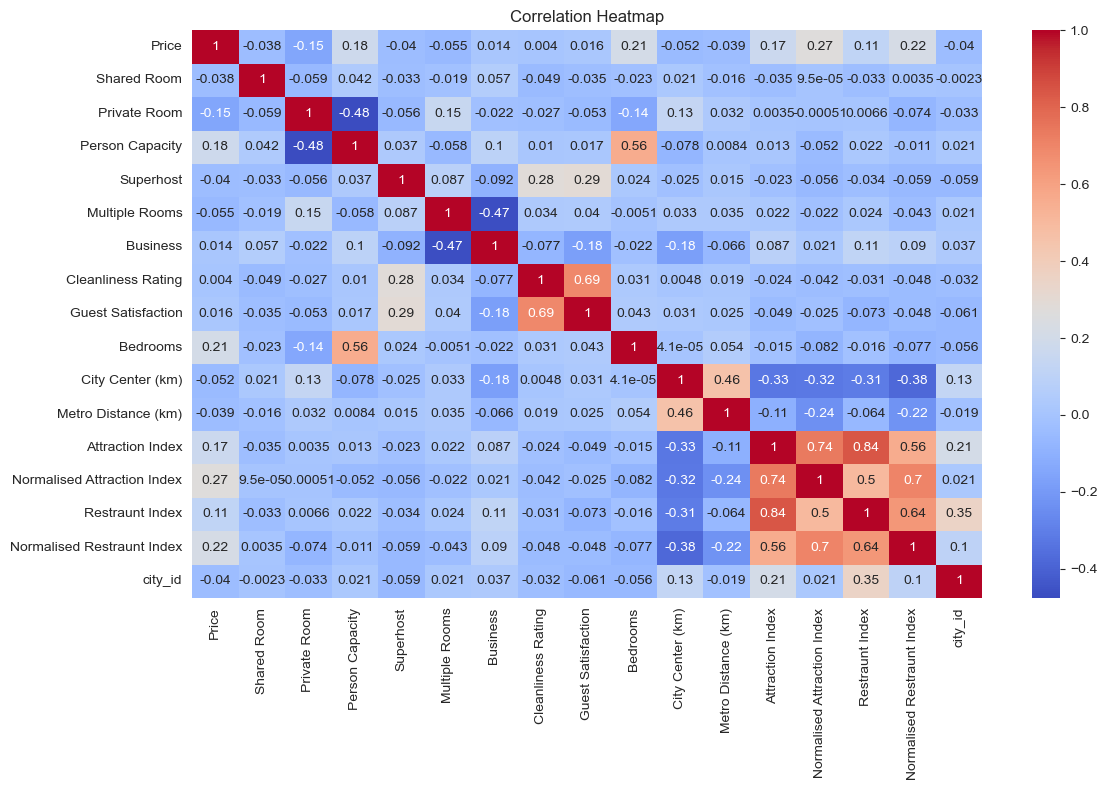

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of 'Guest Satisfaction'
plt.figure(figsize=(8, 6))
sns.histplot(data=my_data, x='Guest Satisfaction', bins=20, kde=True, color='blue')
plt.xlabel('Guest Satisfaction')
plt.ylabel('Frequency')
plt.title('Distribution of Guest Satisfaction')
plt.tight_layout()
plt.show()

# Relationship with other features
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=my_data, x='Cleanliness Rating', y='Guest Satisfaction', color='blue')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Guest Satisfaction')
plt.title('Guest Satisfaction vs. Cleanliness Rating')
plt.tight_layout()
plt.show()

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=my_data, x='Room Type', y='Guest Satisfaction', palette='Set3')
plt.xlabel('Room Type')
plt.ylabel('Guest Satisfaction')
plt.title('Guest Satisfaction by Room Type')
plt.tight_layout()
plt.show()

# Correlation heatmap
correlation_matrix = my_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


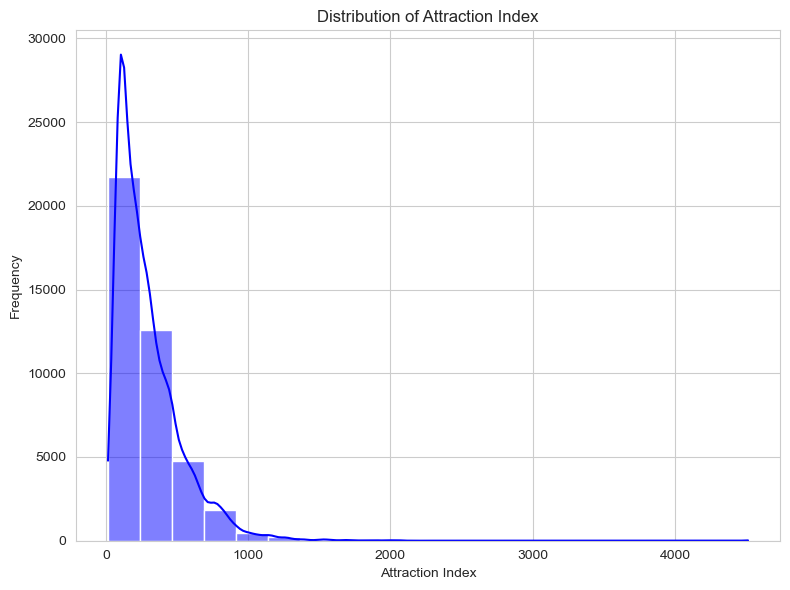

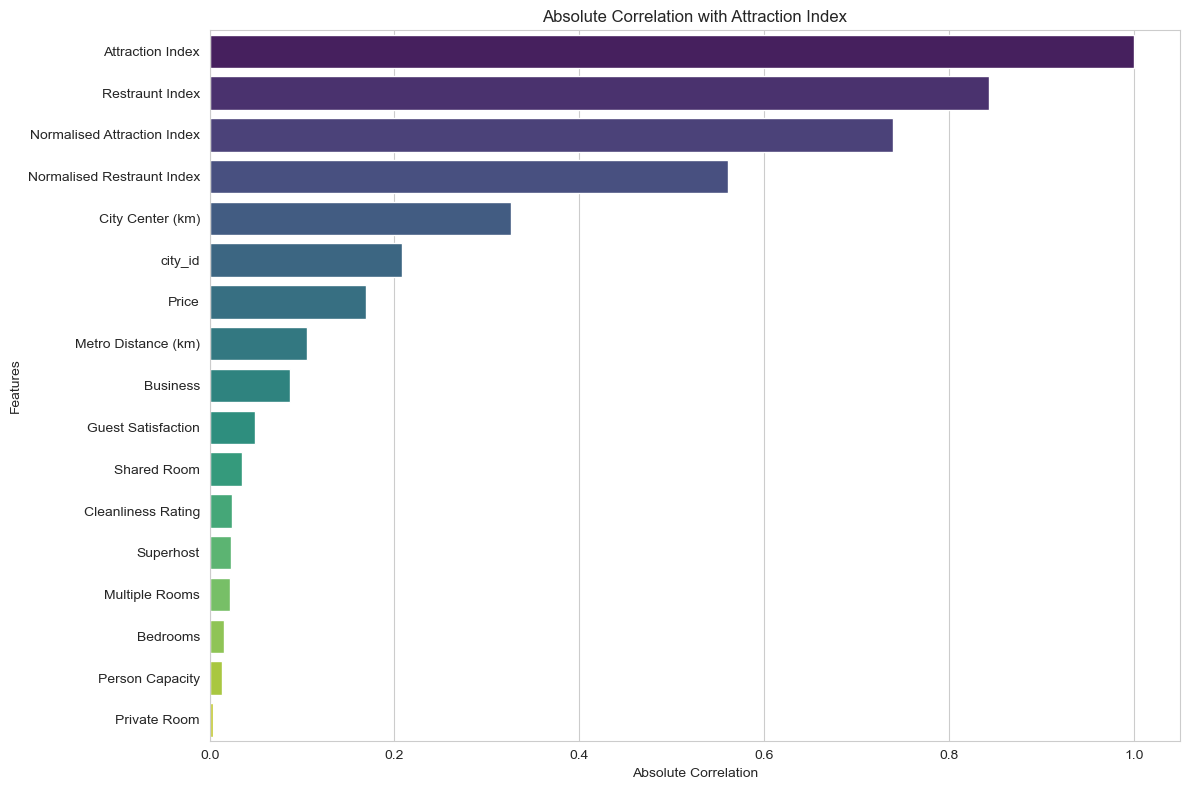

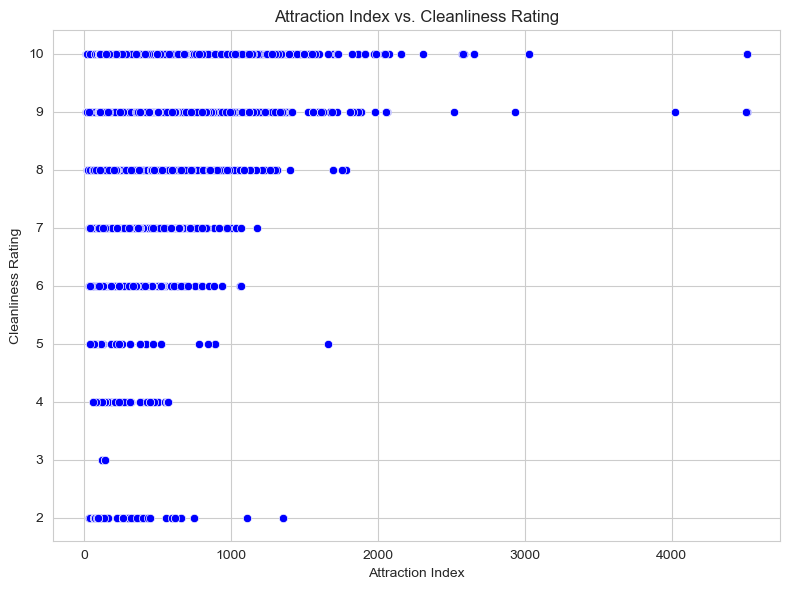

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(data=my_data, x='Attraction Index', bins=20, kde=True, color='blue')
plt.xlabel('Attraction Index')
plt.ylabel('Frequency')
plt.title('Distribution of Attraction Index')
plt.tight_layout()
plt.show()

correlation_matrix = my_data.corr()
attraction_index_correlation = correlation_matrix['Attraction Index']

sorted_correlations = attraction_index_correlation.abs().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='viridis')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.title('Absolute Correlation with Attraction Index')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=my_data, x='Attraction Index', y='Cleanliness Rating', color='blue')
plt.xlabel('Attraction Index')
plt.ylabel('Cleanliness Rating')
plt.title('Attraction Index vs. Cleanliness Rating')
plt.tight_layout()
plt.show()


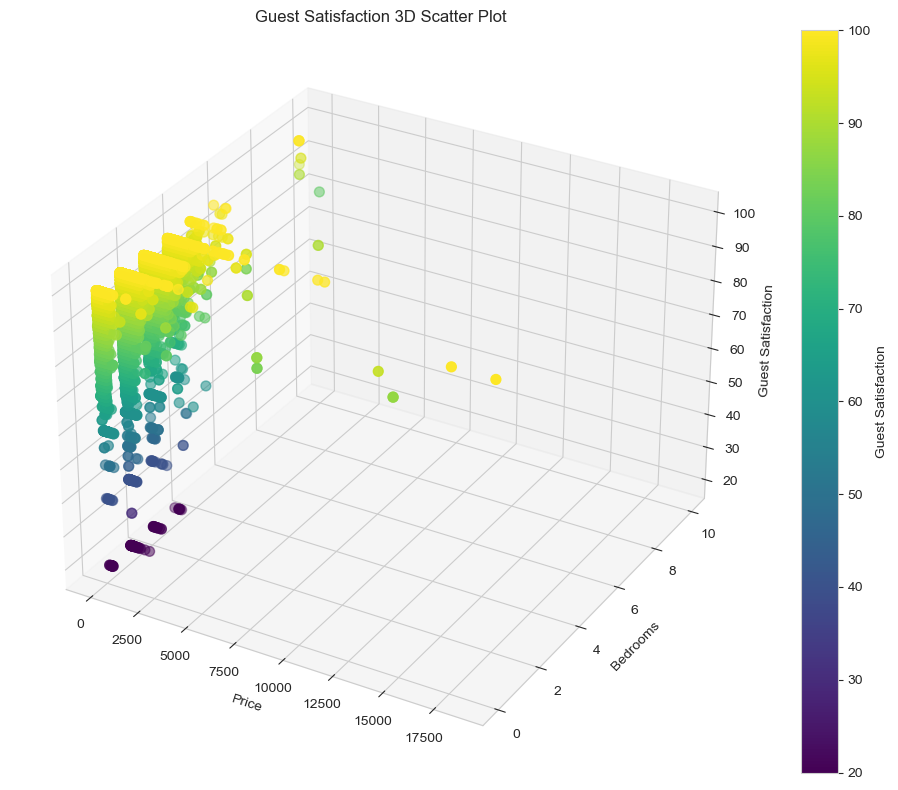

In [56]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(my_data['Price'], my_data['Bedrooms'], my_data['Guest Satisfaction'], c=my_data['Guest Satisfaction'], cmap='viridis', s=50)

cbar = plt.colorbar(scatter)
cbar.set_label('Guest Satisfaction')

# Set labels and title
ax.set_xlabel('Price')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Guest Satisfaction')
ax.set_title('Guest Satisfaction 3D Scatter Plot')

plt.tight_layout()
plt.show()


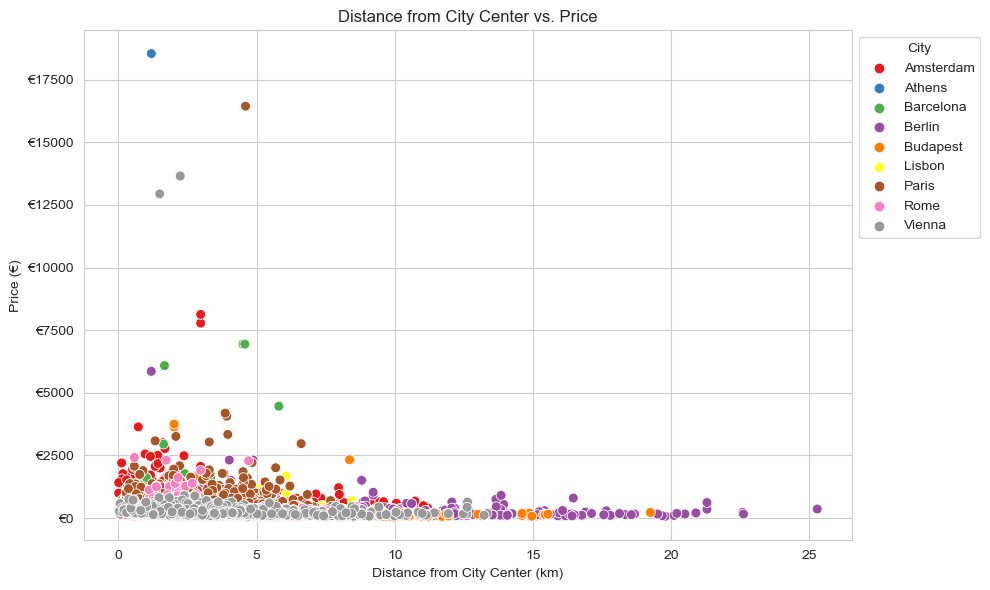

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=my_data, x='City Center (km)', y='Price', hue='City', palette='Set1', s=50)
plt.xlabel('Distance from City Center (km)')
plt.ylabel('Price (€)')

def price_formatter(x, pos):
    return f'€{x:.0f}'

scatter_plot.yaxis.set_major_formatter(mticker.FuncFormatter(price_formatter))

plt.title('Distance from City Center vs. Price')
plt.legend(title='City', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()



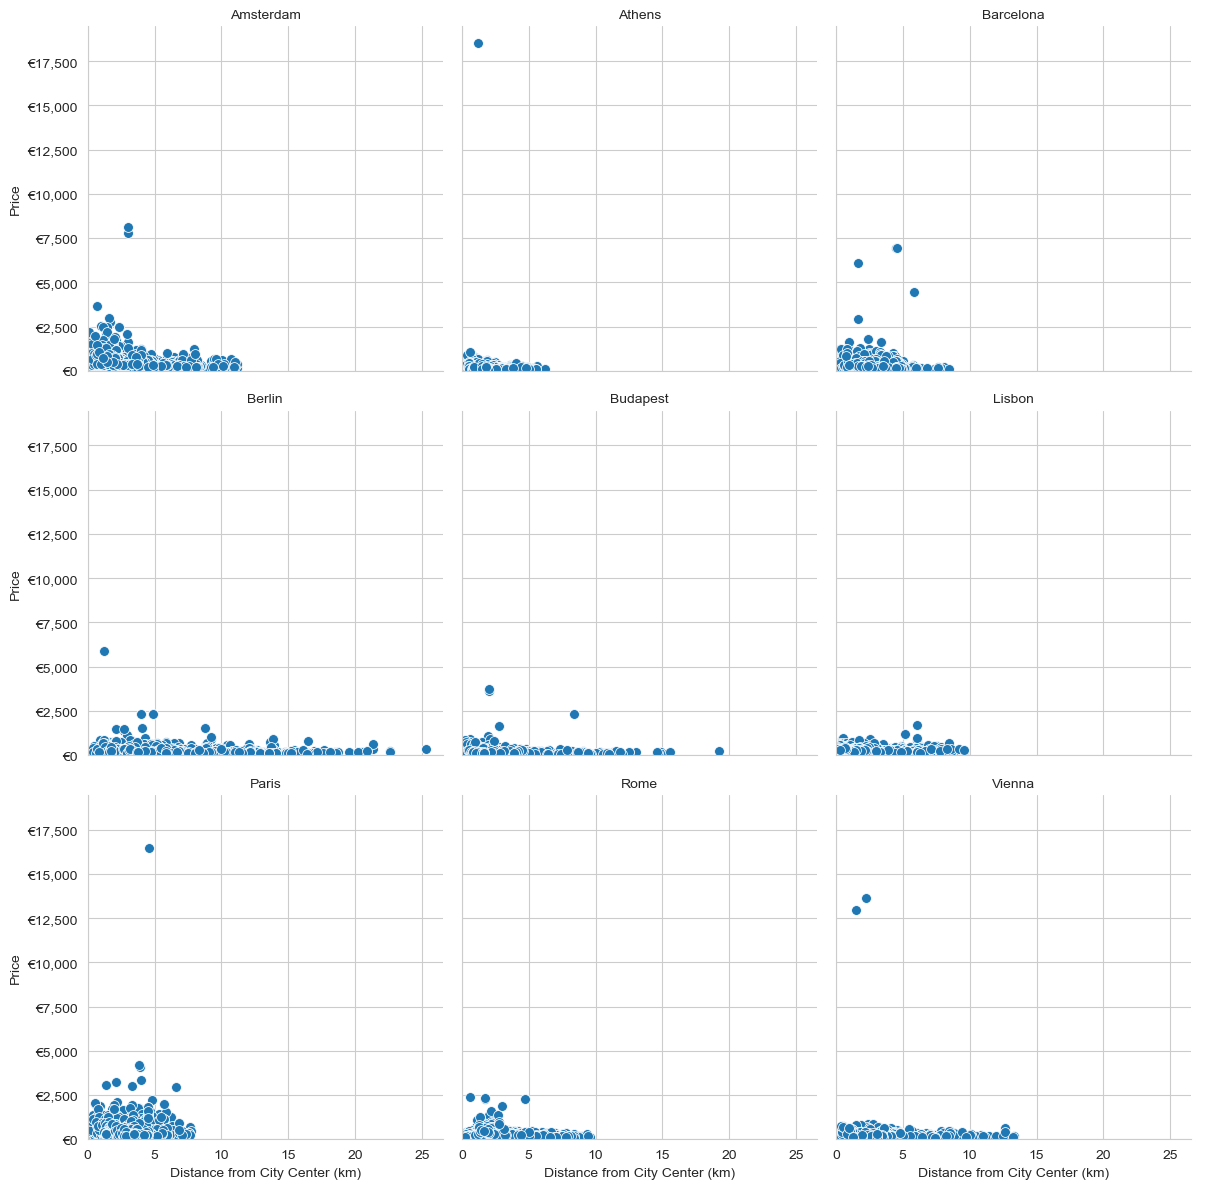

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
g = sns.FacetGrid(my_data, col='City', col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x='City Center (km)', y='Price', s=50)
g.set_axis_labels('Distance from City Center (km)', 'Price')
g.set_titles(col_template="{col_name}")
g.set(xlim=(0, None), ylim=(0, None))

def price_formatter(x, pos):
    return f'€{x:,.0f}'
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter))

g.add_legend()

plt.tight_layout()
plt.savefig('CIty center vs price')


In [59]:

g = sns.FacetGrid(my_data, col='City', col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x='Metro Distance (km)', y='Guest Satisfaction', s=50)
g.set_axis_labels('Metro Distance (km)', 'Guest Satisfaction')
g.set_titles(col_template="{col_name}")
g.set(xlim=(0, None), ylim=(0, None))

g.add_legend()

for ax, city in zip(g.axes.flat, my_data['City'].unique()):
    plt.figure(ax.get_figure().number)  # Select the figure of the current axis
    plt.savefig(f"{city}_scatter_plot.png", bbox_inches='tight')
    plt.close()

print("Plots saved as images.")


Plots saved as images.


C:\Users\User\AppData\Local\Temp\ipykernel_3204\3384798383.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_attraction = my_data.groupby('City')['Attraction Index', 'Price'].corr().iloc[0::2, -1].reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_3204\3384798383.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_restraunt = my_data.groupby('City')['Restraunt Index', 'Price'].corr().iloc[0::2, -1].reset_index()


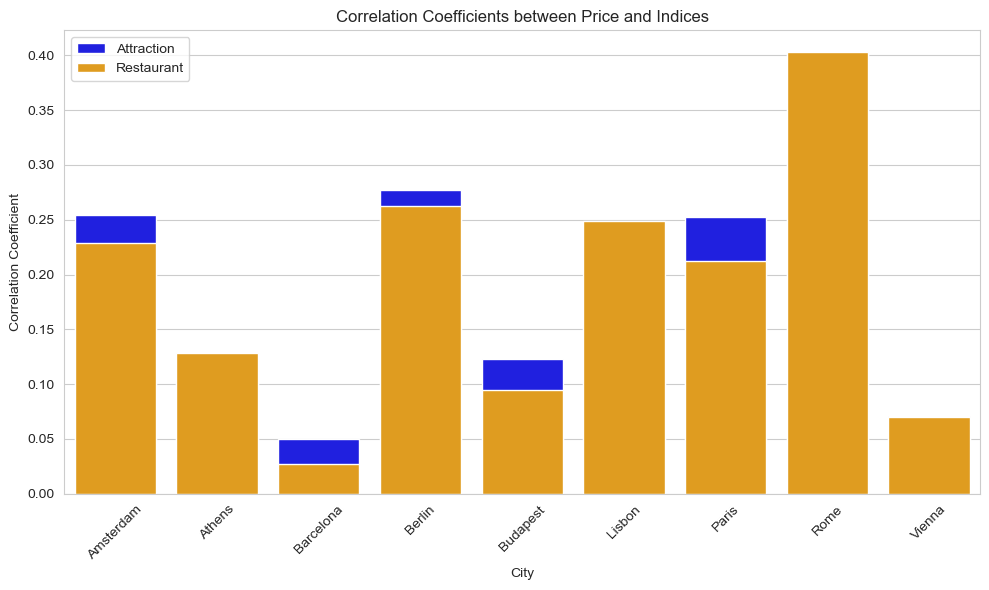

In [60]:

correlation_attraction = my_data.groupby('City')['Attraction Index', 'Price'].corr().iloc[0::2, -1].reset_index()
correlation_restraunt = my_data.groupby('City')['Restraunt Index', 'Price'].corr().iloc[0::2, -1].reset_index()

correlation = pd.merge(correlation_attraction, correlation_restraunt, on='City', suffixes=('_Attraction', '_Restraunt'))
plt.figure(figsize=(10, 6))
sns.barplot(data=correlation, x='City', y='Price_Attraction', color='blue', label='Attraction')
sns.barplot(data=correlation, x='City', y='Price_Restraunt', color='orange', label='Restaurant')
plt.xlabel('City')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Price and Indices')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


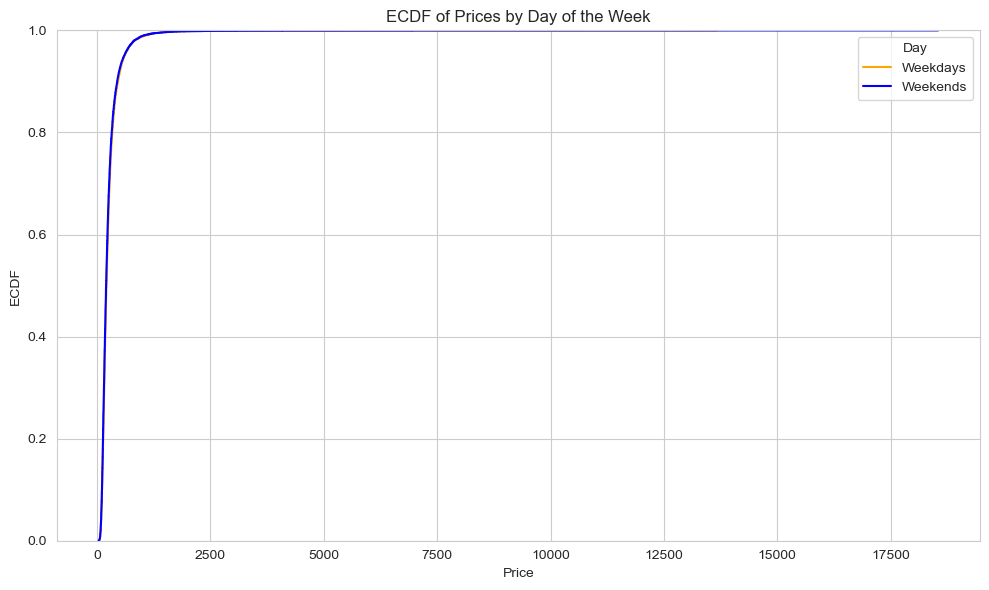

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

my_data['Day'] = my_data['Day'].str.lower()

plt.figure(figsize=(10, 6))
sns.ecdfplot(data=my_data, x='Price', hue='Day', palette=['blue', 'orange'])
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.title('ECDF of Prices by Day of the Week')
plt.legend(title='Day', labels=['Weekdays', 'Weekends'])

plt.tight_layout()
plt.show()


In [62]:
from fpdf import FPDF
import lorem

class PDF(FPDF):
    def __init__(self):
        super().__init__()

    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(w=0, h=8, txt='Airbnb Analysis Presentation', border=0, align='C', ln=1)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(w=0, h=8, txt=f'Page {self.page_no()}', border=0, align='C')

ch = 8

pdf = PDF()
pdf.add_page()

pdf.set_font(family='Arial', style='B', size=20)
pdf.cell(w=0, h=20, txt='Airbnb Analysis Presentation', ln=1, align='C')
pdf.image("C:\\Users\\User\Desktop\\Airbnb-in-Rome-Italy.jpg", x=50, y=None, w=100, h=0)
pdf.set_font(family='Arial', size=12)
pdf.cell(w=30, h=ch, txt='Date:', ln=0)
pdf.cell(w=30, h=ch, txt='29.08.2023', ln=1)
pdf.cell(w=30, h=ch, txt='Author:', ln=0)
pdf.cell(w=30, h=ch, txt='Anca Elena Baciu', ln=1)

mein_text = "meine Analyse zur Verbreitung von Airbnb in ganz Europa"
pdf.ln(3*ch)
pdf.multi_cell(w=0, h=ch, txt=mein_text)

pdf.output('presentation_handout.pdf')

print("Presentation handout PDF generated.")


Presentation handout PDF generated.
